In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

In [70]:
np.random.seed(2025)
n_samples = 1200
n_features = 10


X = np.random.randn(n_samples, n_features)

# Making some features to be related with others
X[:, 2] = 0.8 * X[:, 0] + 0.2 * X[:, 1] + np.random.randn(n_samples) * 0.1
X[:, 4] = -0.5 * X[:, 3] + np.random.randn(n_samples) * 0.1

true_coefs = np.array([5, -3, 0, 2, 0, 0, 0, -1.5, 0, 4])
y = X @ true_coefs + np.random.randn(n_samples) * 2  # Agregar ruido gaussiano

columns = [f'X{i}' for i in range(1, n_features + 1)]
df = pd.DataFrame(X, columns=columns)
df['y'] = y




df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,-0.092390,0.734286,0.180690,-0.663422,0.235760,2.146987,1.393708,-0.207371,0.763587,0.205054,-7.948262
1,-1.041496,-0.828076,-0.944545,-0.088759,0.083972,-1.789323,1.063482,0.037120,-0.163758,-0.328208,1.247618
2,1.588977,-0.188783,1.160698,0.717900,-0.335911,0.782167,0.086991,0.066256,1.200565,-0.061665,7.559535
3,-0.900906,-1.259248,-1.019032,-0.966219,0.529828,0.278186,-0.310756,-0.653905,-0.072948,0.591938,0.469839
4,0.857604,-1.194178,0.512569,-0.645184,0.251127,1.552205,1.216322,0.936337,-0.675551,1.069320,6.158498


In [71]:
alphas = 10 ** np.linspace(-10,10,100)

coefs = []
lambdas = []


X = df.drop('y', axis = 1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2025)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



for alpha1 in alphas:
    ridge = Ridge(alpha = alpha1, fit_intercept=False)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)
    lambdas.append(alpha1)


coefs_ridge = pd.DataFrame(coefs, columns = X.columns)
coefs_ridge['log_lambdas'] = -np.log(lambdas)
coefs_ridge = coefs_ridge.set_index('log_lambdas')


In [72]:
coefs_ridge

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
log_lambdas,,,,,,,,,,
23.025851,4.277497e+00,-3.137782e+00,3.919466e-01,2.198098e+00,2.086665e-01,3.003476e-02,7.876259e-02,-1.530314e+00,-9.160636e-02,4.108157e+00
22.560682,4.277497e+00,-3.137782e+00,3.919466e-01,2.198098e+00,2.086665e-01,3.003476e-02,7.876259e-02,-1.530314e+00,-9.160636e-02,4.108157e+00
22.095514,4.277497e+00,-3.137782e+00,3.919466e-01,2.198098e+00,2.086665e-01,3.003476e-02,7.876259e-02,-1.530314e+00,-9.160636e-02,4.108157e+00
21.630345,4.277497e+00,-3.137782e+00,3.919466e-01,2.198098e+00,2.086665e-01,3.003476e-02,7.876259e-02,-1.530314e+00,-9.160636e-02,4.108157e+00
21.165176,4.277497e+00,-3.137782e+00,3.919466e-01,2.198098e+00,2.086665e-01,3.003476e-02,7.876259e-02,-1.530314e+00,-9.160636e-02,4.108157e+00
...,...,...,...,...,...,...,...,...,...,...
-21.165176,2.560321e-06,-1.459610e-06,2.049076e-06,1.230542e-06,-1.228598e-06,8.953853e-08,8.809857e-08,-9.852248e-07,1.337298e-07,2.171439e-06
-21.630345,1.607957e-06,-9.166775e-07,1.286880e-06,7.728164e-07,-7.715960e-07,5.623286e-08,5.532850e-08,-6.187501e-07,8.398626e-08,1.363727e-06
-22.095514,1.009844e-06,-5.757002e-07,8.081985e-07,4.853514e-07,-4.845849e-07,3.531589e-08,3.474792e-08,-3.885931e-07,5.274584e-08,8.564606e-07


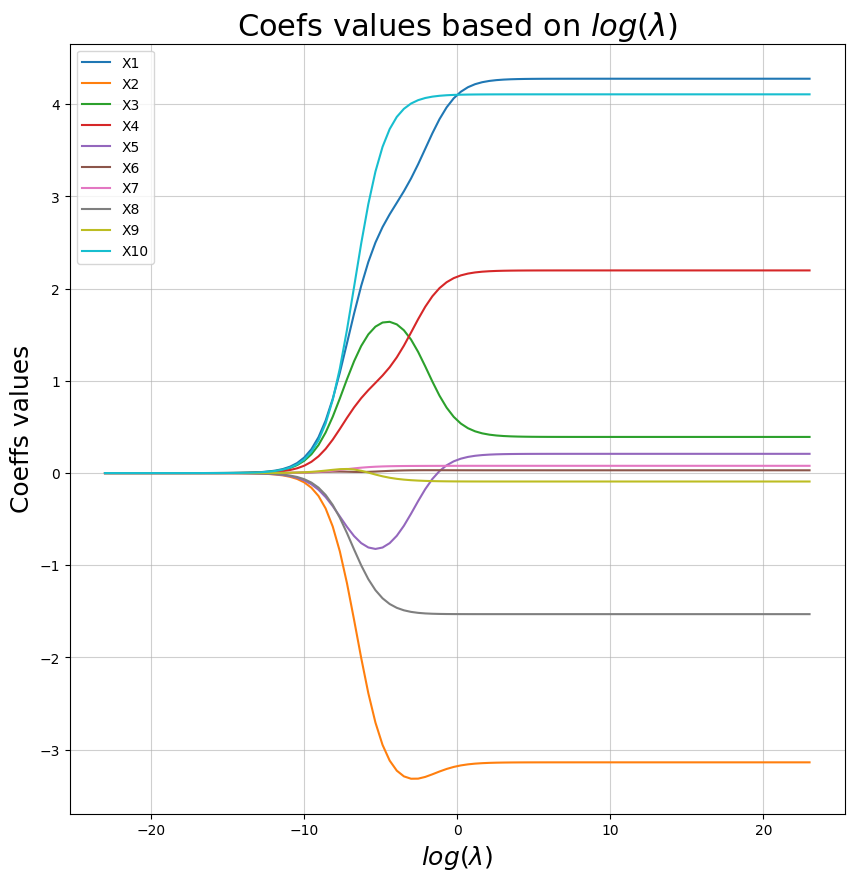

In [73]:
fig, ax = plt.subplots(figsize = (10,10))
coefs_ridge.plot(ax = ax)
ax.set_title('Coefs values based on $log(\lambda)$', fontsize = 22)
ax.set_xlabel('$log(\lambda)$', fontsize = 18)
ax.set_ylabel('Coeffs values', fontsize = 18)
ax.grid(alpha = 0.6)
ax.legend()
fig.show()

# Hypertunning $\lambda$ for Ridge

In [75]:
alphas = 10 ** np.linspace(-10,10,100)
ridge = Ridge()
intercepto = [True, False]
pipe_ridge = Pipeline(steps = [
                ('scaler', scaler),
                ('ridge', ridge),
            ])
grid_param = {'ridge__alpha': alphas, 'ridge__fit_intercept': intercepto}

cross = KFold(n_splits = 10, shuffle = True, random_state = 2025)

grid_ridge = GridSearchCV(estimator = pipe_ridge,
                    param_grid= grid_param,
                    cv = cross,
                    scoring = 'neg_mean_squared_error',
                    n_jobs = -1)

model_ridge = grid_ridge.fit(X_train, y_train)

best_params = model_ridge.best_params_
best_score_ridge = model_ridge.best_score_
best_alpha = model_ridge.best_params_['ridge__alpha']

print(f'Best alpha: {best_alpha}')
print(f'Best model_ridge: {best_params}')
print(f'Score Obtained: {best_score_ridge}')

Best alpha: 0.49770235643321137
Best model_ridge: {'ridge__alpha': 0.49770235643321137, 'ridge__fit_intercept': False}
Score Obtained: -4.338336220593363


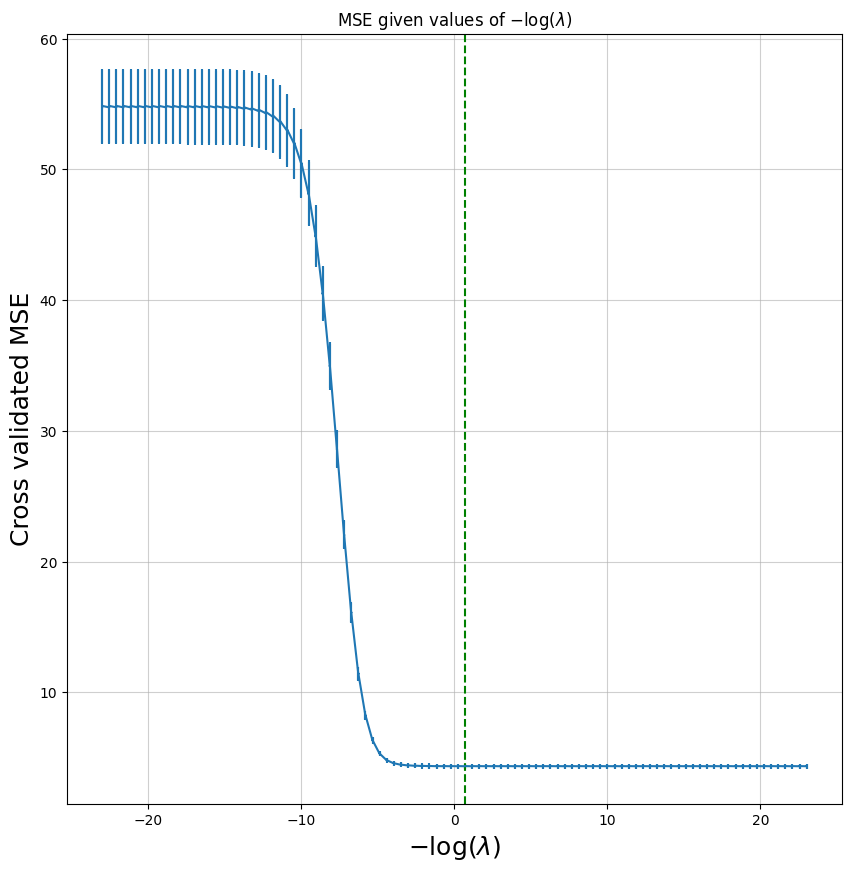

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))

num_folds = 10
cv_alphas = [params['ridge__alpha'] for params in model_ridge.cv_results_['params']]

ax.errorbar(-np.log(cv_alphas),
            -model_ridge.cv_results_['mean_test_score'],
            yerr=model_ridge.cv_results_['std_test_score'] / np.sqrt(num_folds))
ax.axvline(-np.log(best_alpha), color='green', linestyle='--')
ax.set_title('MSE given values of $-\\log(\\lambda)$')
ax.set_xlabel('$-\\log(\\lambda)$', fontsize=18)
ax.set_ylabel('Cross validated MSE', fontsize=18)
ax.grid(alpha=0.6)
fig.show()


# Same Process for Lasso

In [77]:
X = df.drop('y', axis = 1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2025)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = 10 ** np.linspace(-10, 10, 100)
coefs_lasso = []
alpha_vals = []


for alpha1 in alphas:
    lasso = Lasso(alpha = alpha1)
    lasso.fit(X_train_scaled, y_train)
    coefs_lasso.append(lasso.coef_)
    alpha_vals.append(alpha1)

coefs_lasso = pd.DataFrame(coefs_lasso, columns = X.columns)
coefs_lasso['log_lambdas'] = -np.log(alpha_vals)
coefs_lasso = coefs_lasso.set_index('log_lambdas')
coefs_lasso



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.451e+02, tolerance: 4.926e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.316e+02, tolerance: 4.926e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.512e+02, tolerance: 4.926e

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
log_lambdas,,,,,,,,,,
23.025851,4.277498,-3.137782,0.391947,2.198098,0.208666,0.030035,0.078763,-1.530314,-0.091606,4.108157
22.560682,4.277498,-3.137782,0.391947,2.198098,0.208666,0.030035,0.078763,-1.530314,-0.091606,4.108157
22.095514,4.277498,-3.137782,0.391947,2.198098,0.208666,0.030035,0.078763,-1.530314,-0.091606,4.108157
21.630345,4.277498,-3.137782,0.391947,2.198098,0.208666,0.030035,0.078763,-1.530314,-0.091606,4.108157
21.165176,4.277498,-3.137782,0.391947,2.198098,0.208666,0.030035,0.078763,-1.530314,-0.091606,4.108157
...,...,...,...,...,...,...,...,...,...,...
-21.165176,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
-21.630345,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
-22.095514,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000


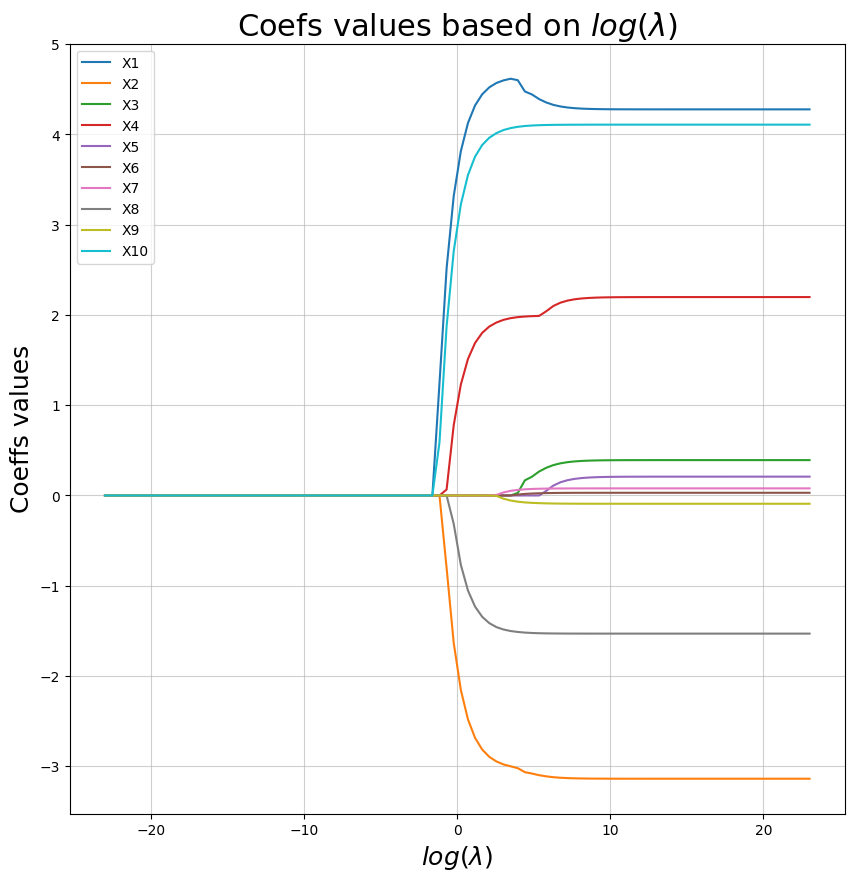

In [78]:
fig, ax = plt.subplots(figsize = (10,10))
coefs_lasso.plot(ax = ax)
ax.set_title('Coefs values based on $log(\lambda)$', fontsize = 22)
ax.set_xlabel('$log(\lambda)$', fontsize = 18)
ax.set_ylabel('Coeffs values', fontsize = 18)
ax.grid(alpha = 0.6)
ax.legend()
fig.show()


In [80]:
alphas = 10 ** np.linspace(-10,10,100)
lasso = Lasso()
intercepto = [True, False]
pipe_lasso = Pipeline(steps = [
                ('scaler', scaler),
                ('lasso', lasso),
            ])
grid_param = {'lasso__alpha': alphas, 'lasso__fit_intercept': intercepto}

cross = KFold(n_splits = 10, shuffle = True, random_state = 2025)

grid_lasso = GridSearchCV(estimator = pipe_lasso,
                    param_grid= grid_param,
                    cv = cross,
                    scoring = 'neg_mean_squared_error',
                    n_jobs = -1)

model_lasso = grid_lasso.fit(X_train, y_train)

best_params = model_lasso.best_params_
best_score_lasso = model_lasso.best_score_
best_alpha = model_lasso.best_params_['lasso__alpha']

print(f'Best alpha: {best_alpha}')
print(f'Best model_lasso: {best_params}')
print(f'Score Obtained: {best_score_lasso}')

Best alpha: 0.030538555088334123
Best model_lasso: {'lasso__alpha': 0.030538555088334123, 'lasso__fit_intercept': False}
Score Obtained: -4.330629412784375


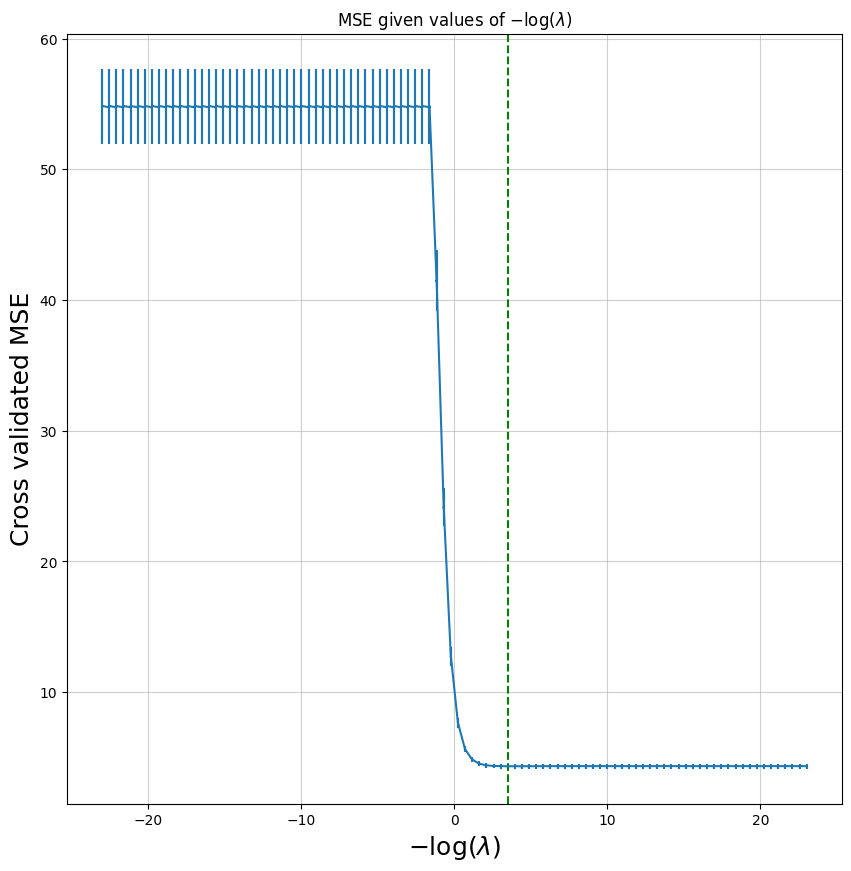

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))

num_folds = 10
cv_alphas = [params['lasso__alpha'] for params in model_lasso.cv_results_['params']]

ax.errorbar(-np.log(cv_alphas),
            -model_lasso.cv_results_['mean_test_score'],
            yerr=model_lasso.cv_results_['std_test_score'] / np.sqrt(num_folds))
ax.axvline(-np.log(best_alpha), color='green', linestyle='--')
ax.set_title('MSE given values of $-\\log(\\lambda)$')
ax.set_xlabel('$-\\log(\\lambda)$', fontsize=18)
ax.set_ylabel('Cross validated MSE', fontsize=18)
ax.grid(alpha=0.6)
fig.show()


In [82]:
print(f'Scores Comparation')
print(f'Ridge score was: {best_score_ridge}')
print(f'Lasso score was: {best_score_lasso}')


Scores Comparation
Ridge score was: -4.338336220593363
Lasso score was: -4.330629412784375


In [86]:
print(f'True coefficients of the artificial dataset are: {true_coefs}')
best_lasso_model = model_lasso.best_estimator_
for i, beta_i in enumerate(best_lasso_model.named_steps['lasso'].coef_):
    print(f'X{i}: {beta_i}')

True coefficients of the artificial dataset are: [ 5.  -3.   0.   2.   0.   0.   0.  -1.5  0.   4. ]
X0: 4.6170068213663
X1: -3.0003548988007123
X2: 0.0
X3: 1.9646460905973258
X4: -0.0
X5: 0.0
X6: 0.051464904750595446
X7: -1.5015629212896016
X8: -0.05602092574897895
X9: 4.07023249348162


Conclusion


Here we can see that lasso outperformes the ridge regression by a small amount, but lasso dropped 3 out of 4 params which were absolute noise. Looking at the results we can see that lasso didnt get the last param probably to the fact of colineality which is a problem that should been taking in consideration on the feature selection before applying this regularization. The multicolineality effect is covering the nature of this noise feature.